# Project for Fundamentals for Data Analysis
This project requires the user to perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle [1].<br>
The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

### References
[1] https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv <br>
[2] https://numpy.org/ <br>
[3] https://pandas.pydata.org/pandas-docs/stable/index.html <br>
[4] https://seaborn.pydata.org/generated/seaborn.scatterplot.html <br>
[5] http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm#:~:text=A%20linear%20regression%20line%20has,y%20when%20x%20%3D%200) <br>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import the data set from Moodle and covert it to a data frame
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df=pd.read_csv(url)
df    

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [21]:
x = df["speed"]
y = df["power"]

<AxesSubplot:xlabel='speed', ylabel='power'>

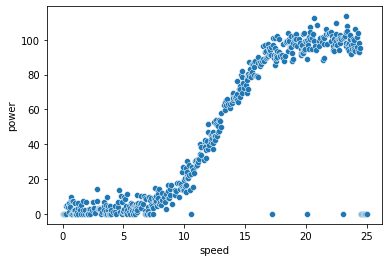

In [23]:
import seaborn as sns

# visualise the data using a scatterplot [5]
sns.scatterplot(data=df, x="speed", y="power")

The scatterplot above shows that there is a relatively low Power output (represented on the y axis) while the Speed is at values between 0 and 10 (x axis). However when Speed increases above 10 there is a noticable increase in Power.  This continues up until Speed reaches about 17 and Power levels off while Speed continues to increase up to 25.

[  4.91759567 -13.89990263]


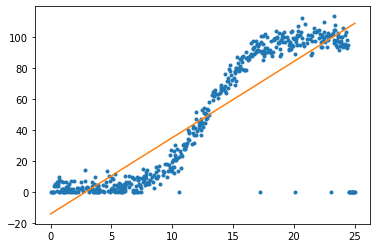

In [28]:
# to complete a simple linear regression using polyfit in Matplotlib
# first plot the data points
plt.plot(x, y, ".", label="Wind Turbine Output")

#then determine the coefficients
coeffs = np.polyfit(x, y, 1)
print(coeffs)
# polyfit returns the numbers that describes the line that is the best fit for the data
# so we can use the equation y = a*x + b to produce this line
y_bestfit = coeffs[0]*x + coeffs[1]
plt.plot(x, y_bestfit, label= "Best fit line")
